In [4]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
import math
import numpy as np
sys.path.append('../../pytools')
import d2l
import collections
import re
import random

d2l.gpu_mem_init()

Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [5]:
batch_size, num_steps, num_hiddens, lr, num_epochs = 32, 35, 512,2.0, 300
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

困惑度 1.0, 489.2 词元/秒 /GPU:0
time traveller for so it will be convenient to speak of himwas ex
traveller after the pauserequired for the proper assimilatio


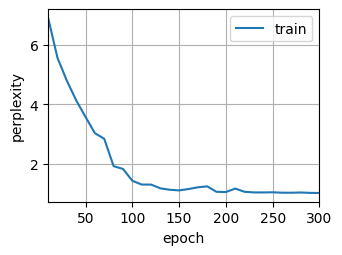

In [6]:
#原书例子中使用'glorot_uniform'初始化，收敛速度慢，且ppl到4.x就下不去了，替换成random.normal后，收敛速度快很多，最终的ppl值也下降到1.x左右
gru_cell = tf.keras.layers.GRUCell(num_hiddens, kernel_initializer=tf.random.normal)
gru_layer = tf.keras.layers.RNN(gru_cell, return_sequences=True, return_state=True)
device_name = d2l.try_gpu()._device_name
strategy = tf.distribute.OneDeviceStrategy(device_name)
with strategy.scope():
    model = d2l.RNNModel(gru_layer, vocab_size=len(vocab))

d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, strategy, kerasV3=True)
